# Planar Geometries

Shapely is a Python package for manipulation and analysis of planar geometric objects. It is based on the widely deployed GEOS (the engine of PostGIS) and JTS (from which GEOS is ported) libraries. Shapely is not concerned with data formats or coordinate systems, but can be integrated with packages that are.

The fundamental types of geometric objects implemented by Shapely are points, curves, and surfaces.

In [1]:
from shapely.geometry import Point, LineString, LinearRing, Polygon, MultiPoint, MultiLineString, MultiPolygon, GeometryCollection

## Geometric objects

### Points

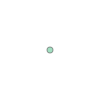

In [2]:
# A point is a feature of dimension zero. It has zero length and zero area
# A point is instantiated via its coordinates -- (x,y) for 2D, (x,y,z) for 3D, (x,y,z,t) for 4D
p = Point(0, 0)
p

In [3]:
# Find out the area and length of a point
# Find out how to access its coordinates


In [4]:
# There are several ways to represent a geometry
# WKT: https://en.wikipedia.org/wiki/Well-known_text
# WKB: https://mariadb.com/kb/en/mariadb/well-known-binary-wkb-format/
# Familiarize yourself with them


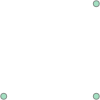

In [5]:
# A Multipoint is a collection of Points. It's instantiated with a list of points
p2 = Point(1, 0)
p3 = Point(1, 1)
mp = MultiPoint([p, p2, p3])
mp

In [6]:
# The convex hull of a set X of points is the smallest convex set that contains X
# Imagine an elastic band stretched around the geometry: that's a convex hull, more or less
# Explore the convex hull of the geometries above


In [7]:
# The envelope is the point or smallest rectangular polygon (with sides parallel to the coordinate axes) 
# that contains the geometry
# Explore the envelope of the geometries above


In [8]:
# The bounding box (property "bounds") is a (minx, miny, maxx, maxy) tuple
# This tuple coincides with the coordinates of the envelope polygon
# Explore the bounding box of the geometries above


In [9]:
# A buffer is a geometry with an envelope at a given distance from the object's envelope
# Create buffers of various sizes on the geometries above


### Curves

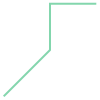

In [10]:
# A linestring is a feature of dimension one comprising one or more line segments
# It has non-zero length and zero area. Unlike a LinearRing, a LineString is not closed
# It's instantiated with a list of 2D or 3D coordinate tuples
ls = LineString([[0, 0], [1, 1], [1, 2], [2, 2]])
ls

In [11]:
# The length of a LineString is the sum of lengths of its segments
# Check that


In [12]:
# A buffer around a LineString is like a thick line
# Visualize that


In [13]:
# A LineString can be open or closed. A closed LineString starts and ends at the same coordinate
# Is this linestring closed?


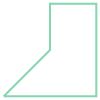

In [14]:
# A LinearRing is a CLOSED one-dimensional feature comprising one or more line segments
lr = LinearRing([[0, 0], [1, 1], [1, 2], [2, 2], [2, 0], [0, 0]])
lr

In [15]:
# Is this linear ring closed?


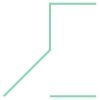

In [16]:
# A MultiLineString is a collection of LineString objects
mls = MultiLineString([ls, LineString([[1, 0], [2, 0]])])
mls

### Surfaces

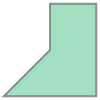

In [17]:
# A polygon is a two-dimensional feature bounded by a linear ring
# It has non-zero area and length. It can be initialized from a sequence of coordinates or from a linear ring
pl = Polygon(lr)
pl

In [18]:
# Check area, length and boundary of this polygon


In [19]:
# The  centroid or geometric center of a two-dimensional region is the arithmetic mean 
# ("average") position of all the points in the shape
# Where is the centroid of this polygon?


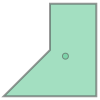

In [20]:
GeometryCollection([pl, pl.centroid])

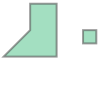

In [21]:
# A Multipolygon is a collection of Polygons
mpl = MultiPolygon([pl, Polygon([[3, 0.5], [3.5, 0.5], [3.5, 1], [3, 1]])])
mpl

In [22]:
# Visualize and understand the difference between convex hull and envelope for this multipolygon

In [23]:
# What's the well-known text representation of a MultiPolygon?


In [24]:
# The Multipolygon is iterable on each of the polygons it contains
# Check that


In [25]:
# The area of a MultiPolygon is the sum of areas of its constituents
# Verify that


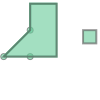

In [26]:
# A GeometryCollection is a heterogeneous collection of any geometry (including other collections)
gc = GeometryCollection([mp, ls, lr, mpl])
gc

In [27]:
[g for g in gc]

## Relations between geometric objects

The most interesting questions about geodata are usually answered employing methods that allow to compare relationships between geometries

### Intersects

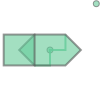

In [28]:
# Create some random geometries
p = Point([0.5, 0.5])
p2 = Point([2, 2])
ls = LineString([[0, 0], [0.5, 0], [0.5, 0.5], [1, 0.5], [1, 1]])
pl = Polygon([[0, 0], [1, 0], [1.5, 0.5], [1, 1], [0, 1], [-0.5, 0.5], [0, 0]])
pl2 = Polygon([[0, 0], [0, 1], [-1, 1], [-1, 0]])
gc = GeometryCollection([p, p2, ls, pl, pl2])
gc

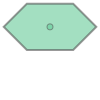

In [29]:
GeometryCollection([pl, p])

In [30]:
# Intersects returns true if the two shapes have any space in common
# (if their boundaries or interiors intersect)
# Check if the geometries above intersect (in pairs of two)


In [31]:
# Intersects is a symmetric function
# Verify that


In [32]:
# Intersection returns the common space of the geometries
# Compute the intersection of various pairs of geometries contained in the collection above


### Contains

In [33]:
# Contains returns true if the geometry contains the other fully, else False

# Point contained in polygon -- True
print(pl.contains(p))

# Point outside polygon -- False
print(pl.contains(p2))

# Polygons partially overlapping -- False
print(pl.contains(pl2))

# Linestring contained in polygon touching its boundary -- True
print(pl.contains(ls))

# Contains is not symmetric
print(p.contains(pl))


True
False
False
True
False


### Overlaps

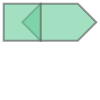

In [34]:
GeometryCollection([pl, pl2])

In [35]:
# Overlaps returns true if the geometries share space, are of the same dimension, 
# but are not completely contained by each other.
pl.overlaps(pl2)

True

In [36]:
# Comparing geometries of different dimension returns false
ls.overlaps(pl)

False

In [37]:
p.overlaps(pl)

False

### Further functions: Crosses, Disjoint, Equals, Touches

In [38]:
# Try yourself


### Buffer

In [39]:
# Buffer returns a geometry with an envelope at a distance from the object's envelope
# Compute a buffer around our first point and first linestring above


In [40]:
# Visualize the point and its buffer; the linestring and its buffer


In [41]:
# Create a buffer around our polygon, visualize it


In [42]:
# Create a buffer with negative distance. What happens to the geometry?


In [43]:
# What happens if we create a negative buffer on a geometry with zero area?


In [44]:
# What happens if we create a buffer of zero size?


### Distance

[(0.5, 0.5)]
[(2.0, 2.0)]


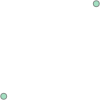

In [45]:
print(list(p.coords))
print(list(p2.coords))
GeometryCollection([p, p2])

In [46]:
# Distance computes the Euclidean (straight line) distance between geometries
# Compute the distance between p and p2


Distance implements formula $ \sqrt{\sum_{i=1}^n (q_i-p_i)^2} $ between points p and q.

In [47]:
# Check that the distance function indeed implements the function above


In [48]:
# Distance is a symmetric function. Check that


In [49]:
# Distance between Point and LineString equals the perpendicular distance
# i.e. distance between point and the point corresponding to its orthogonal projection on the LineString
# Compute and understand distances between p and ls, p2 and ls


In [50]:
# Compute and understand distances between polygons


#### GeoJSON###

GeoJSON is an open standard format for encoding collections of simple geographical features along with their non-spatial attributes using JavaScript Object Notation. [Wikipedia GeoJSON](https://en.wikipedia.org/wiki/GeoJSON)

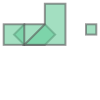

In [51]:
polygons = GeometryCollection([pl, pl2, mpl[0], mpl[1]])
polygons

In [53]:
from geopandas import GeoDataFrame
import json

In [54]:
gdf = GeoDataFrame([pl, pl2, mpl[0], mpl[1]], columns=['geometry'])
gdf['area'] = gdf.apply(lambda g: g['geometry'].area, axis=1)
gdf['perimeter'] = gdf.apply(lambda g: g['geometry'].length, axis=1)
gdf

,geometry,area,perimeter
0,"POLYGON ((0 0, 1 0, 1.5 0.5, 1 1, 0 1, -0.5 0....",1.50,4.828427
1,"POLYGON ((0 0, 0 1, -1 1, -1 0, 0 0))",1.00,4.000000
2,"POLYGON ((0 0, 1 1, 1 2, 2 2, 2 0, 0 0))",2.50,7.414214
3,"POLYGON ((3 0.5, 3.5 0.5, 3.5 1, 3 1, 3 0.5))",0.25,2.000000


In [55]:
# GeoDataFrame.to_json() generates a GeoJSON 
# A column named 'geometry' is mandatory, additional columns are set as properties
geo_json = gdf.to_json()
geo_json

'{"features": [{"geometry": {"type": "Polygon", "coordinates": [[[0.0, 0.0], [1.0, 0.0], [1.5, 0.5], [1.0, 1.0], [0.0, 1.0], [-0.5, 0.5], [0.0, 0.0]]]}, "id": "0", "type": "Feature", "properties": {"perimeter": 4.828427124746191, "area": 1.5}}, {"geometry": {"type": "Polygon", "coordinates": [[[0.0, 0.0], [0.0, 1.0], [-1.0, 1.0], [-1.0, 0.0], [0.0, 0.0]]]}, "id": "1", "type": "Feature", "properties": {"perimeter": 4.0, "area": 1.0}}, {"geometry": {"type": "Polygon", "coordinates": [[[0.0, 0.0], [1.0, 1.0], [1.0, 2.0], [2.0, 2.0], [2.0, 0.0], [0.0, 0.0]]]}, "id": "2", "type": "Feature", "properties": {"perimeter": 7.414213562373095, "area": 2.5}}, {"geometry": {"type": "Polygon", "coordinates": [[[3.0, 0.5], [3.5, 0.5], [3.5, 1.0], [3.0, 1.0], [3.0, 0.5]]]}, "id": "3", "type": "Feature", "properties": {"perimeter": 2.0, "area": 0.25}}], "type": "FeatureCollection"}'

In [56]:
json.loads(geo_json)

{'features': [{'geometry': {'coordinates': [[[0.0, 0.0],
      [1.0, 0.0],
      [1.5, 0.5],
      [1.0, 1.0],
      [0.0, 1.0],
      [-0.5, 0.5],
      [0.0, 0.0]]],
    'type': 'Polygon'},
   'id': '0',
   'properties': {'area': 1.5, 'perimeter': 4.828427124746191},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[0.0, 0.0],
      [0.0, 1.0],
      [-1.0, 1.0],
      [-1.0, 0.0],
      [0.0, 0.0]]],
    'type': 'Polygon'},
   'id': '1',
   'properties': {'area': 1.0, 'perimeter': 4.0},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[0.0, 0.0],
      [1.0, 1.0],
      [1.0, 2.0],
      [2.0, 2.0],
      [2.0, 0.0],
      [0.0, 0.0]]],
    'type': 'Polygon'},
   'id': '2',
   'properties': {'area': 2.5, 'perimeter': 7.414213562373095},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[3.0, 0.5],
      [3.5, 0.5],
      [3.5, 1.0],
      [3.0, 1.0],
      [3.0, 0.5]]],
    'type': 'Polygon'},
   'id': '3',
   'properties': {'area': 0.25, 'perimeter': 2.0},
   't

### Further exercises

1. Define the square centered at the origin of coordinates and with side of length 1 (sq1)
2. Define the square centered at the origin of coordinates and with side of length 2 (sq2)
3. Compute the area of "sq2 complement sq1" (sq2 minus sq1)
4. Define the line between the following two points: p1 = (-95.98, 45.03); p2 = (-113.73, 40.11)
5. A buffer which has distance 5 around the following location: p = (-100.46/39.16)
6. Calculate the intersection between the line and buffer. Display the buffer information as well-known text.